In [1]:
#libary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Read Dataframe  as Vehicle

In [2]:
vehicle=pd.read_csv('vehicle.csv')

In [3]:
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# Exploratory data analysis

# 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers 

In [4]:
vehicle.shape

(846, 19)

In [5]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

we can see we have missing value in several cloumns

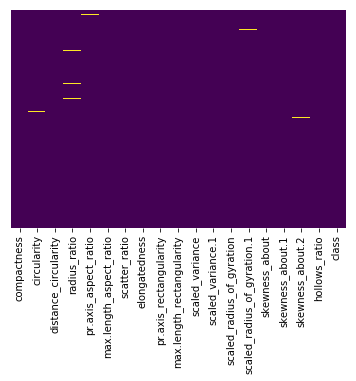

In [7]:
sns.heatmap(vehicle.isnull(),yticklabels=False,cbar=False,cmap='viridis')

we can see few missing values in more than one columns

In [8]:
vehicle.groupby(["class"]).count() #lets group the classes and we can see car class dominates half of data set

compactness  circularity  distance_circularity  radius_ratio  \
class                                                                 
bus            218          214                   215           216   
car            429          428                   429           426   
van            199          199                   198           198   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
class                                                                 
bus                     217                      218            218   
car                     428                      429            428   
van                     199                      199            199   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
class                                                                     
bus              218                     217                        218   
car              428                     428                        429   
van              199                     198                        199   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
class                                                                  
bus                218                218                        216   
car                427                427                        429   
van                198                199                        199   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
class                                                                  
bus                            217             214               218   
car                            426             427               428   
van                            199             199               199   

       skewness_about.2  hollows_ratio  
class                                   
bus                 218            218  
car                 428            429  
van                 199            199

In [9]:
vehicle.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

# Checking the presence of outliers

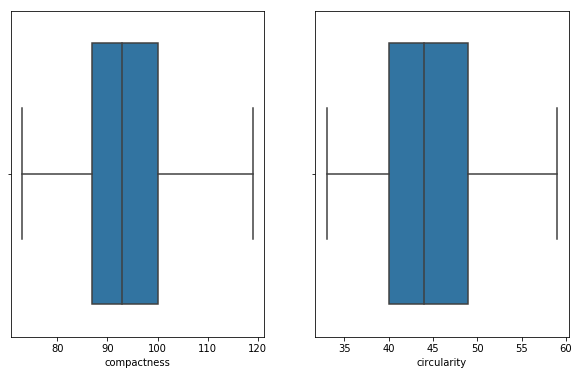

In [10]:
# lets visulaize the outliers using box plots
fig, (a,b)=plt.subplots(1,2,figsize=(10,6))
sns.boxplot(vehicle['compactness'],ax=a)
sns.boxplot(vehicle['circularity'],ax=b)

#no outlilers in these two coloumns

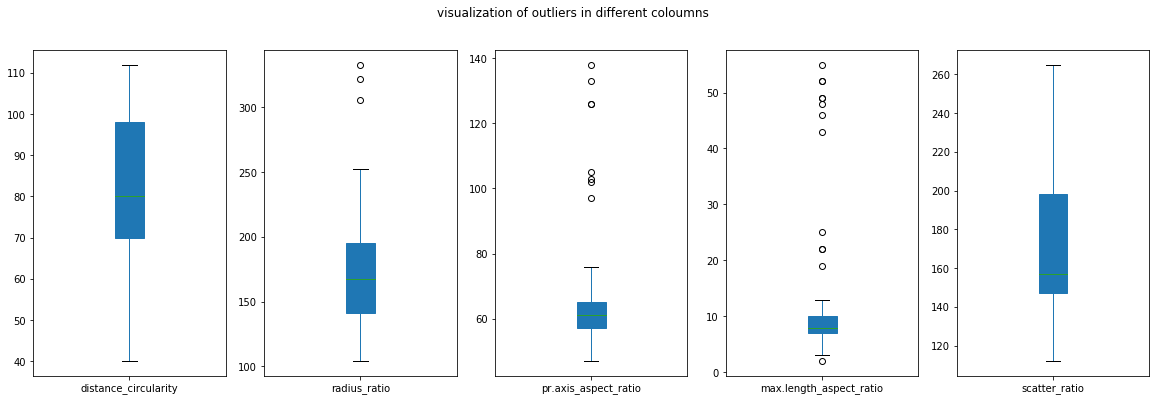

In [11]:
 vehicle[['distance_circularity','radius_ratio','pr.axis_aspect_ratio',
          'max.length_aspect_ratio','scatter_ratio']].plot(kind = 'box', 
            figsize = (20,6),
            subplots = True, layout = (1,5),
            sharex = False, sharey = False,patch_artist=True,
            title='visualization of outliers in different coloumns')
plt.show()
#we can see outliers in radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio

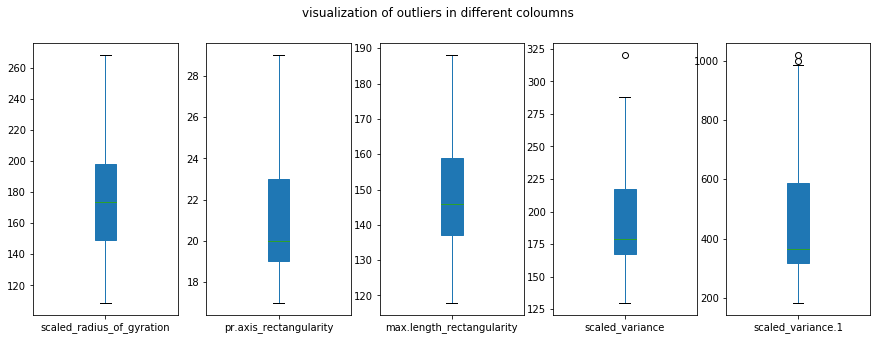

In [12]:
 vehicle[['scaled_radius_of_gyration','pr.axis_rectangularity','max.length_rectangularity',
         'scaled_variance','scaled_variance.1']].plot(kind = 'box', 
    figsize = (15,5),
    subplots = True, layout = (1,5),
    sharex = False, sharey = False,patch_artist=True, 
    title='visualization of outliers in different coloumns')
plt.show()
# we can see outliers in scaled_variance and scaled_varience1

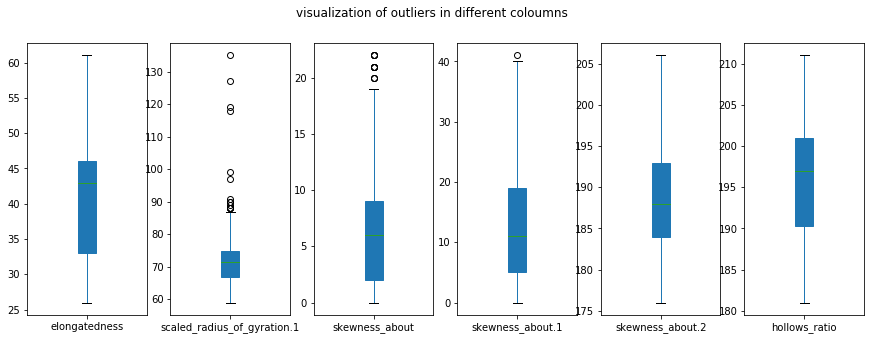

In [13]:
 vehicle[['elongatedness','scaled_radius_of_gyration.1','skewness_about','skewness_about.1',
          'skewness_about.2','hollows_ratio']].plot(kind = 'box', 
            figsize = (15,5),
            subplots = True, layout = (1,6),
            sharex = False, sharey = False,patch_artist=True,
            title='visualization of outliers in different coloumns')
plt.show()
#we can see outliers in scaled_radius_of_gyration.1,skewness_about,skewness_about.1

From above all box plots across different numericals clomuns we seen outliers in different attributes like radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_variance and scaled_varience1,scaled_radius_of_gyration.1,skewness_about,skewness_about.1

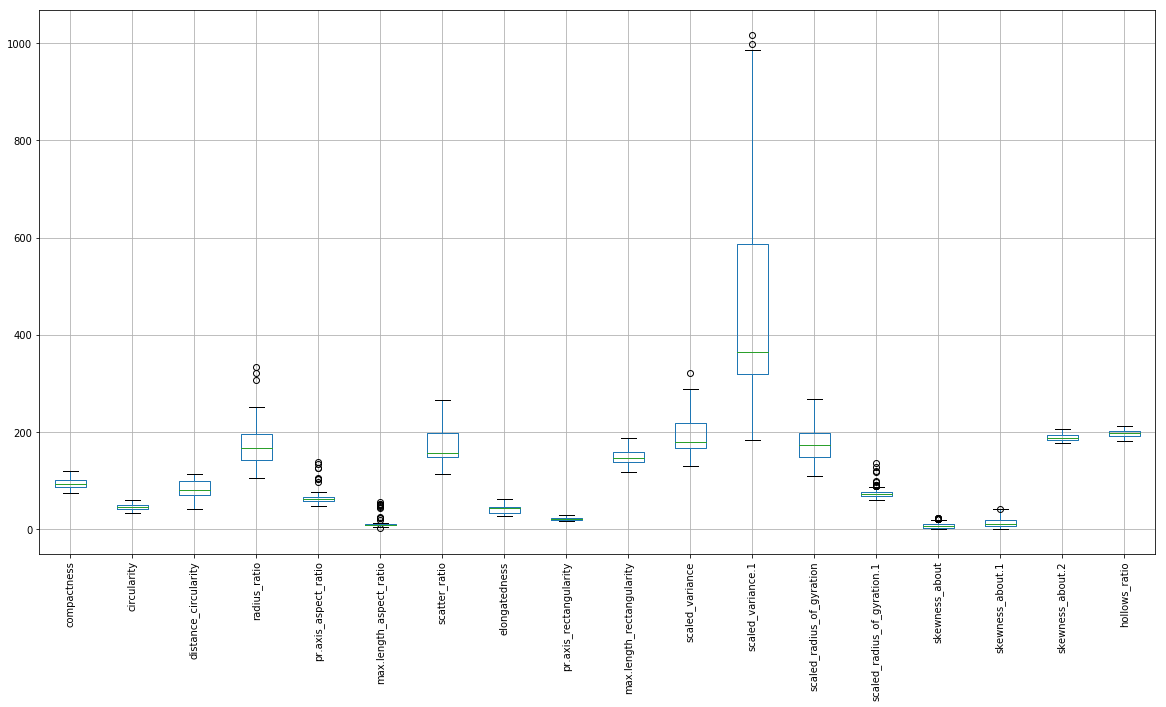

In [14]:
# Plot the central tendency of the dataset
_, bp = vehicle.boxplot(return_type='both', figsize=(20,10), rot='vertical')

fliers = [flier.get_ydata() for flier in bp["fliers"]]
boxes = [box.get_ydata() for box in bp["boxes"]]
caps = [cap.get_ydata() for cap in bp['caps']]
whiskers = [whiskers.get_ydata() for whiskers in bp["whiskers"]]

In [15]:
#lets see the out liers for each attribute
for idx, col in enumerate(vehicle.columns[:-1]):
    print(col, '--', len(fliers[idx]))

compactness -- 0
circularity -- 0
distance_circularity -- 0
radius_ratio -- 3
pr.axis_aspect_ratio -- 8
max.length_aspect_ratio -- 13
scatter_ratio -- 0
elongatedness -- 0
pr.axis_rectangularity -- 0
max.length_rectangularity -- 0
scaled_variance -- 1
scaled_variance.1 -- 2
scaled_radius_of_gyration -- 0
scaled_radius_of_gyration.1 -- 15
skewness_about -- 12
skewness_about.1 -- 1
skewness_about.2 -- 0
hollows_ratio -- 0


In [16]:
# Treat the outlier data points
for idx, col in enumerate(vehicle.columns[:-1]):
    q1 = vehicle[col].quantile(0.25)
    q3 = vehicle[col].quantile(0.75)
    low = q1 - 1.5*(q3 - q1)
    high = q3 + 1.5*(q3 - q1)

    vehicle.loc[(vehicle[col] < low), col] = caps[idx * 2][0]
    vehicle.loc[(vehicle[col] > high), col] = caps[idx * 2 + 1][0]

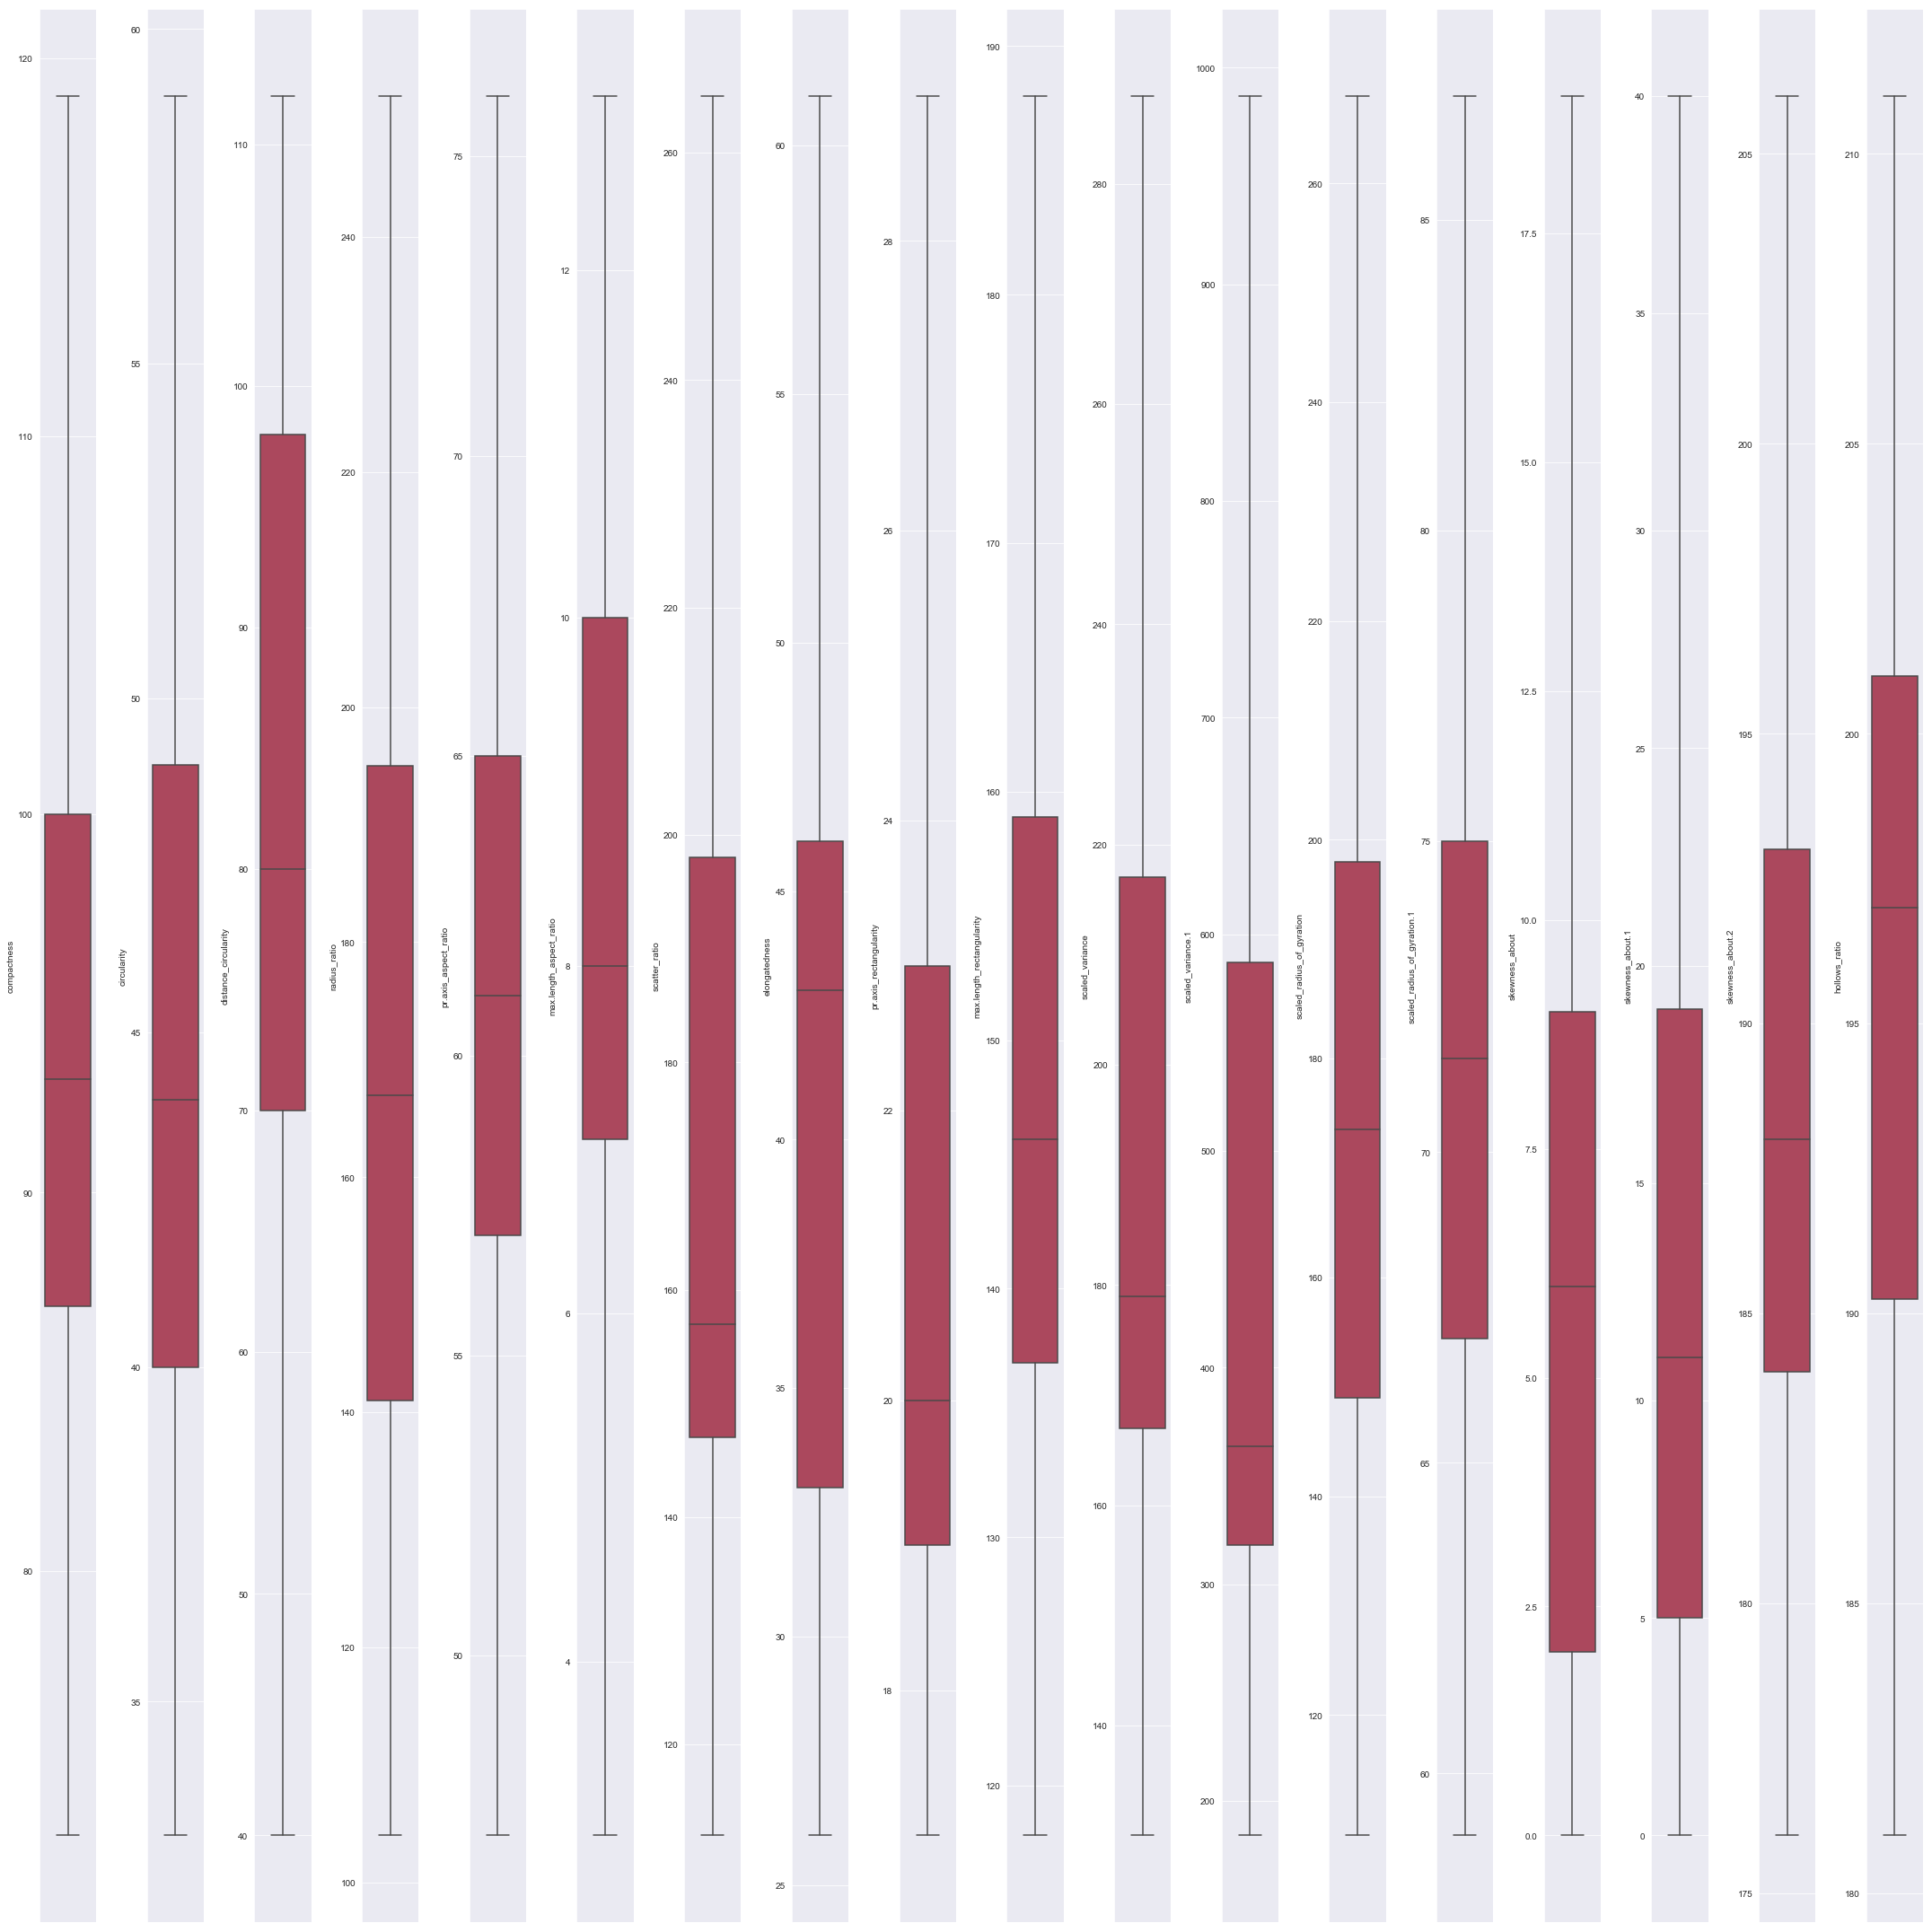

In [17]:
# Check the dataset after Outlier treatment
sns.set_style('darkgrid')
plt.figure(figsize=(30, 30))
index = 1
for col in vehicle.columns[:-1]:
    plt.subplot(1, len(vehicle.columns[:-1]), index)
    sns.boxplot(y=vehicle[col], palette='inferno', fliersize=12)
    index += 1
plt.tight_layout()

In [18]:
vehicle[vehicle.isnull().any(axis=1)]

compactness  circularity  distance_circularity  radius_ratio  \
5          107.0          NaN                 106.0         172.0   
9           93.0         44.0                  98.0           NaN   
19         101.0         56.0                 100.0         215.0   
35         100.0         46.0                   NaN         172.0   
66          81.0         43.0                  68.0         125.0   
70          96.0         55.0                  98.0         161.0   
77          86.0         40.0                  62.0         140.0   
78         104.0         52.0                  94.0           NaN   
105        108.0          NaN                 103.0         202.0   
118         85.0          NaN                   NaN         128.0   
141         81.0         42.0                  63.0         125.0   
159         91.0         45.0                  75.0           NaN   
177         89.0         44.0                  72.0         160.0   
192         93.0         43.0                  76.0         149.0   
207         85.0         42.0                   NaN         121.0   
215         90.0         39.0                  86.0         169.0   
222        100.0         50.0                  81.0         197.0   
237         85.0         45.0                  65.0         128.0   
249         85.0         34.0                  53.0         127.0   
266         86.0          NaN                  65.0         116.0   
273         96.0         45.0                  80.0         162.0   
285         89.0         48.0                  85.0         189.0   
287         88.0         43.0                  84.0           NaN   
308        109.0         51.0                 100.0         197.0   
319        102.0         51.0                   NaN         194.0   
329         89.0         38.0                  80.0         169.0   
345        101.0         54.0                 106.0           NaN   
372         97.0         47.0                  87.0         164.0   
396        108.0          NaN                 106.0         177.0   
419         93.0         34.0                  72.0         144.0   
467         96.0         54.0                 104.0           NaN   
496        106.0         55.0                  98.0         224.0   
522         89.0         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                      6.0          255.0   
9                    62.0                     11.0          183.0   
19                    NaN                     10.0          208.0   
35                   67.0                      9.0          157.0   
66                   57.0                      8.0          149.0   
70                   54.0                     10.0          215.0   
77                   62.0                      7.0          150.0   
78                   66.0                      5.0          208.0   
105                  64.0                     10.0          220.0   
118                  56.0                      8.0          150.0   
141                  55.0                      8.0          149.0   
159                  57.0                      6.0          150.0   
177                  66.0                      7.0          144.0   
192                  57.0                      7.0          149.0   
207                  55.0                      7.0          149.0   
215                  62.0                      7.0          162.0   
222                   NaN                      6.0          186.0   
237                  56.0                      8.0          151.0   
249                  58.0                      6.0            NaN   
266                  53.0                      6.0          152.0   
273                  63.0                      9.0          146.0   
285                  64.0                      8.0          169.0   
287                  55.0                     11.0          154.0   
30

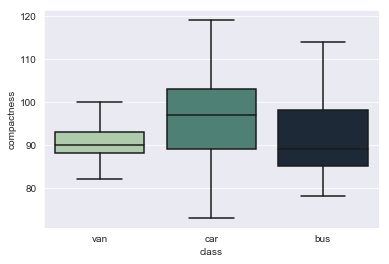

In [19]:
sns.boxplot(x="class", y="compactness", palette="ch:r=-.5,l=.75", data=vehicle); #box plot of target clasess


# Treat missing values (Handle missing missing values)

In [20]:
 X=vehicle.drop(['class'], axis=1) #lets drop target coloumn class 

In [21]:
 y=vehicle[['class']]

In [22]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imp=imputer.fit_transform(X)
X = pd.DataFrame(imp,columns=[X.columns])

In [23]:
X.isnull().sum()/len(vehicle) #perctentage wise missing value and you can see its very less info missing

compactness                    0.0
circularity                    0.0
distance_circularity           0.0
radius_ratio                   0.0
pr.axis_aspect_ratio           0.0
max.length_aspect_ratio        0.0
scatter_ratio                  0.0
elongatedness                  0.0
pr.axis_rectangularity         0.0
max.length_rectangularity      0.0
scaled_variance                0.0
scaled_variance.1              0.0
scaled_radius_of_gyration      0.0
scaled_radius_of_gyration.1    0.0
skewness_about                 0.0
skewness_about.1               0.0
skewness_about.2               0.0
hollows_ratio                  0.0
dtype: float64

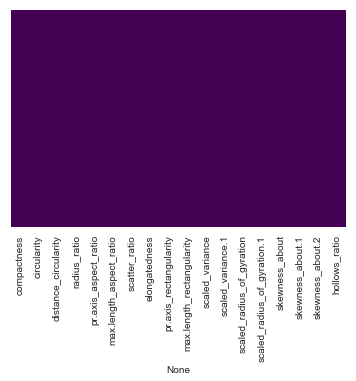

In [24]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis') #lets see after imputation of missing values

as we can see we succesfully imputed missing value with median values

# 2. Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why 

# Feature Engineering

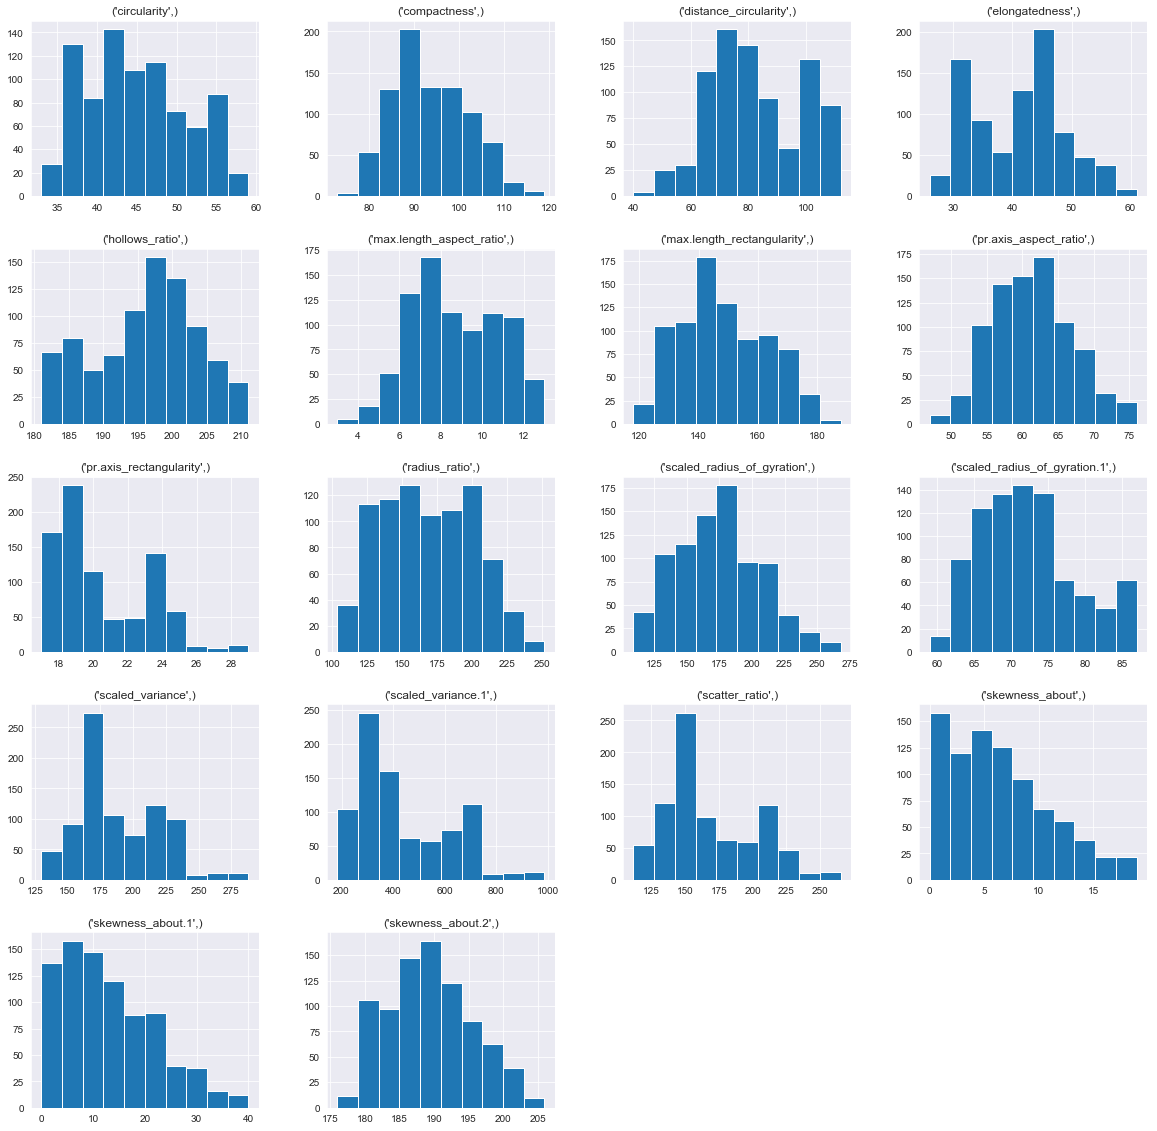

In [25]:
p= X.hist(figsize = (20,20)) # lets see the disribution of all diffrent attributes in one plot

we can see data is not normally distributed in many attributes like max_length_aspect_ratio,scaled_radius_of_gyration.1 andmany attributes skwed and have multiple guassians

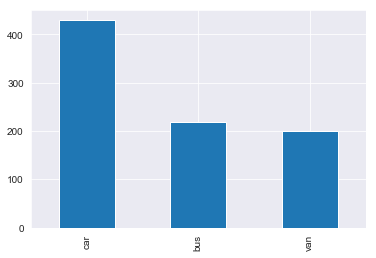

In [26]:
pd.value_counts(vehicle["class"]).plot(kind="bar") 
#lets see how target column class is and we can see car is having more wieght.

# Feature selection

In [27]:
#lets import extra tree classifier to find out the feature importance of data
from sklearn.ensemble import ExtraTreesClassifier

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.03380483 0.03786963 0.04742338 0.03195031 0.05819837 0.16824298
 0.04948847 0.12080266 0.08037785 0.05545777 0.03754399 0.08829456
 0.04105078 0.03457179 0.0246915  0.02323178 0.02879052 0.03820883]


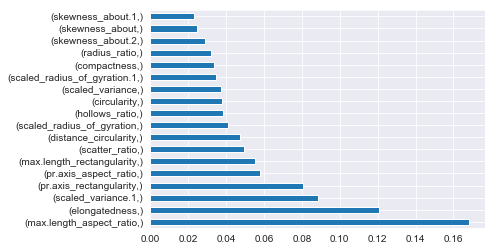

In [28]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

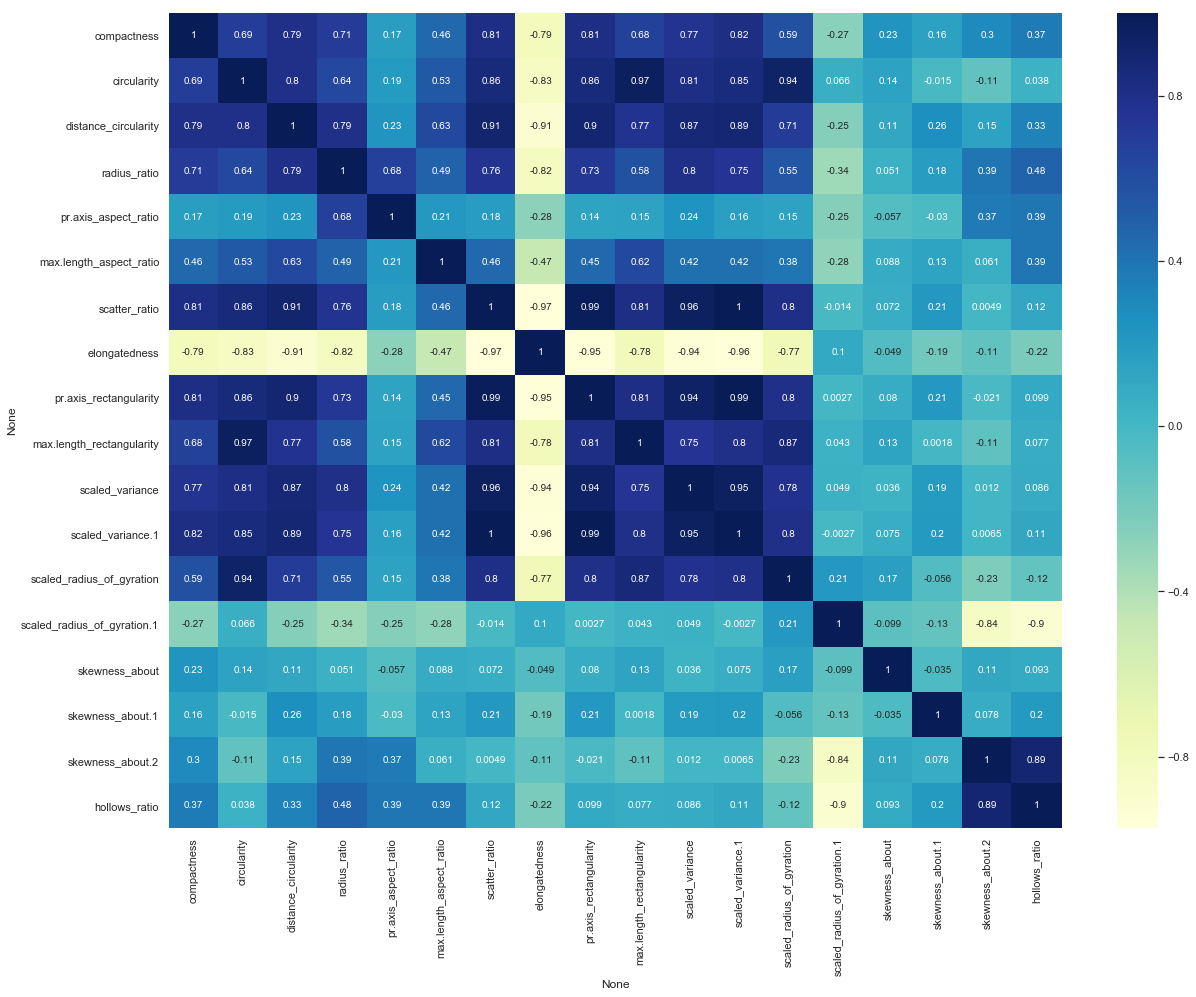

In [29]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(X.corr(),annot=True, annot_kws={"size": 10},cmap="YlGnBu")

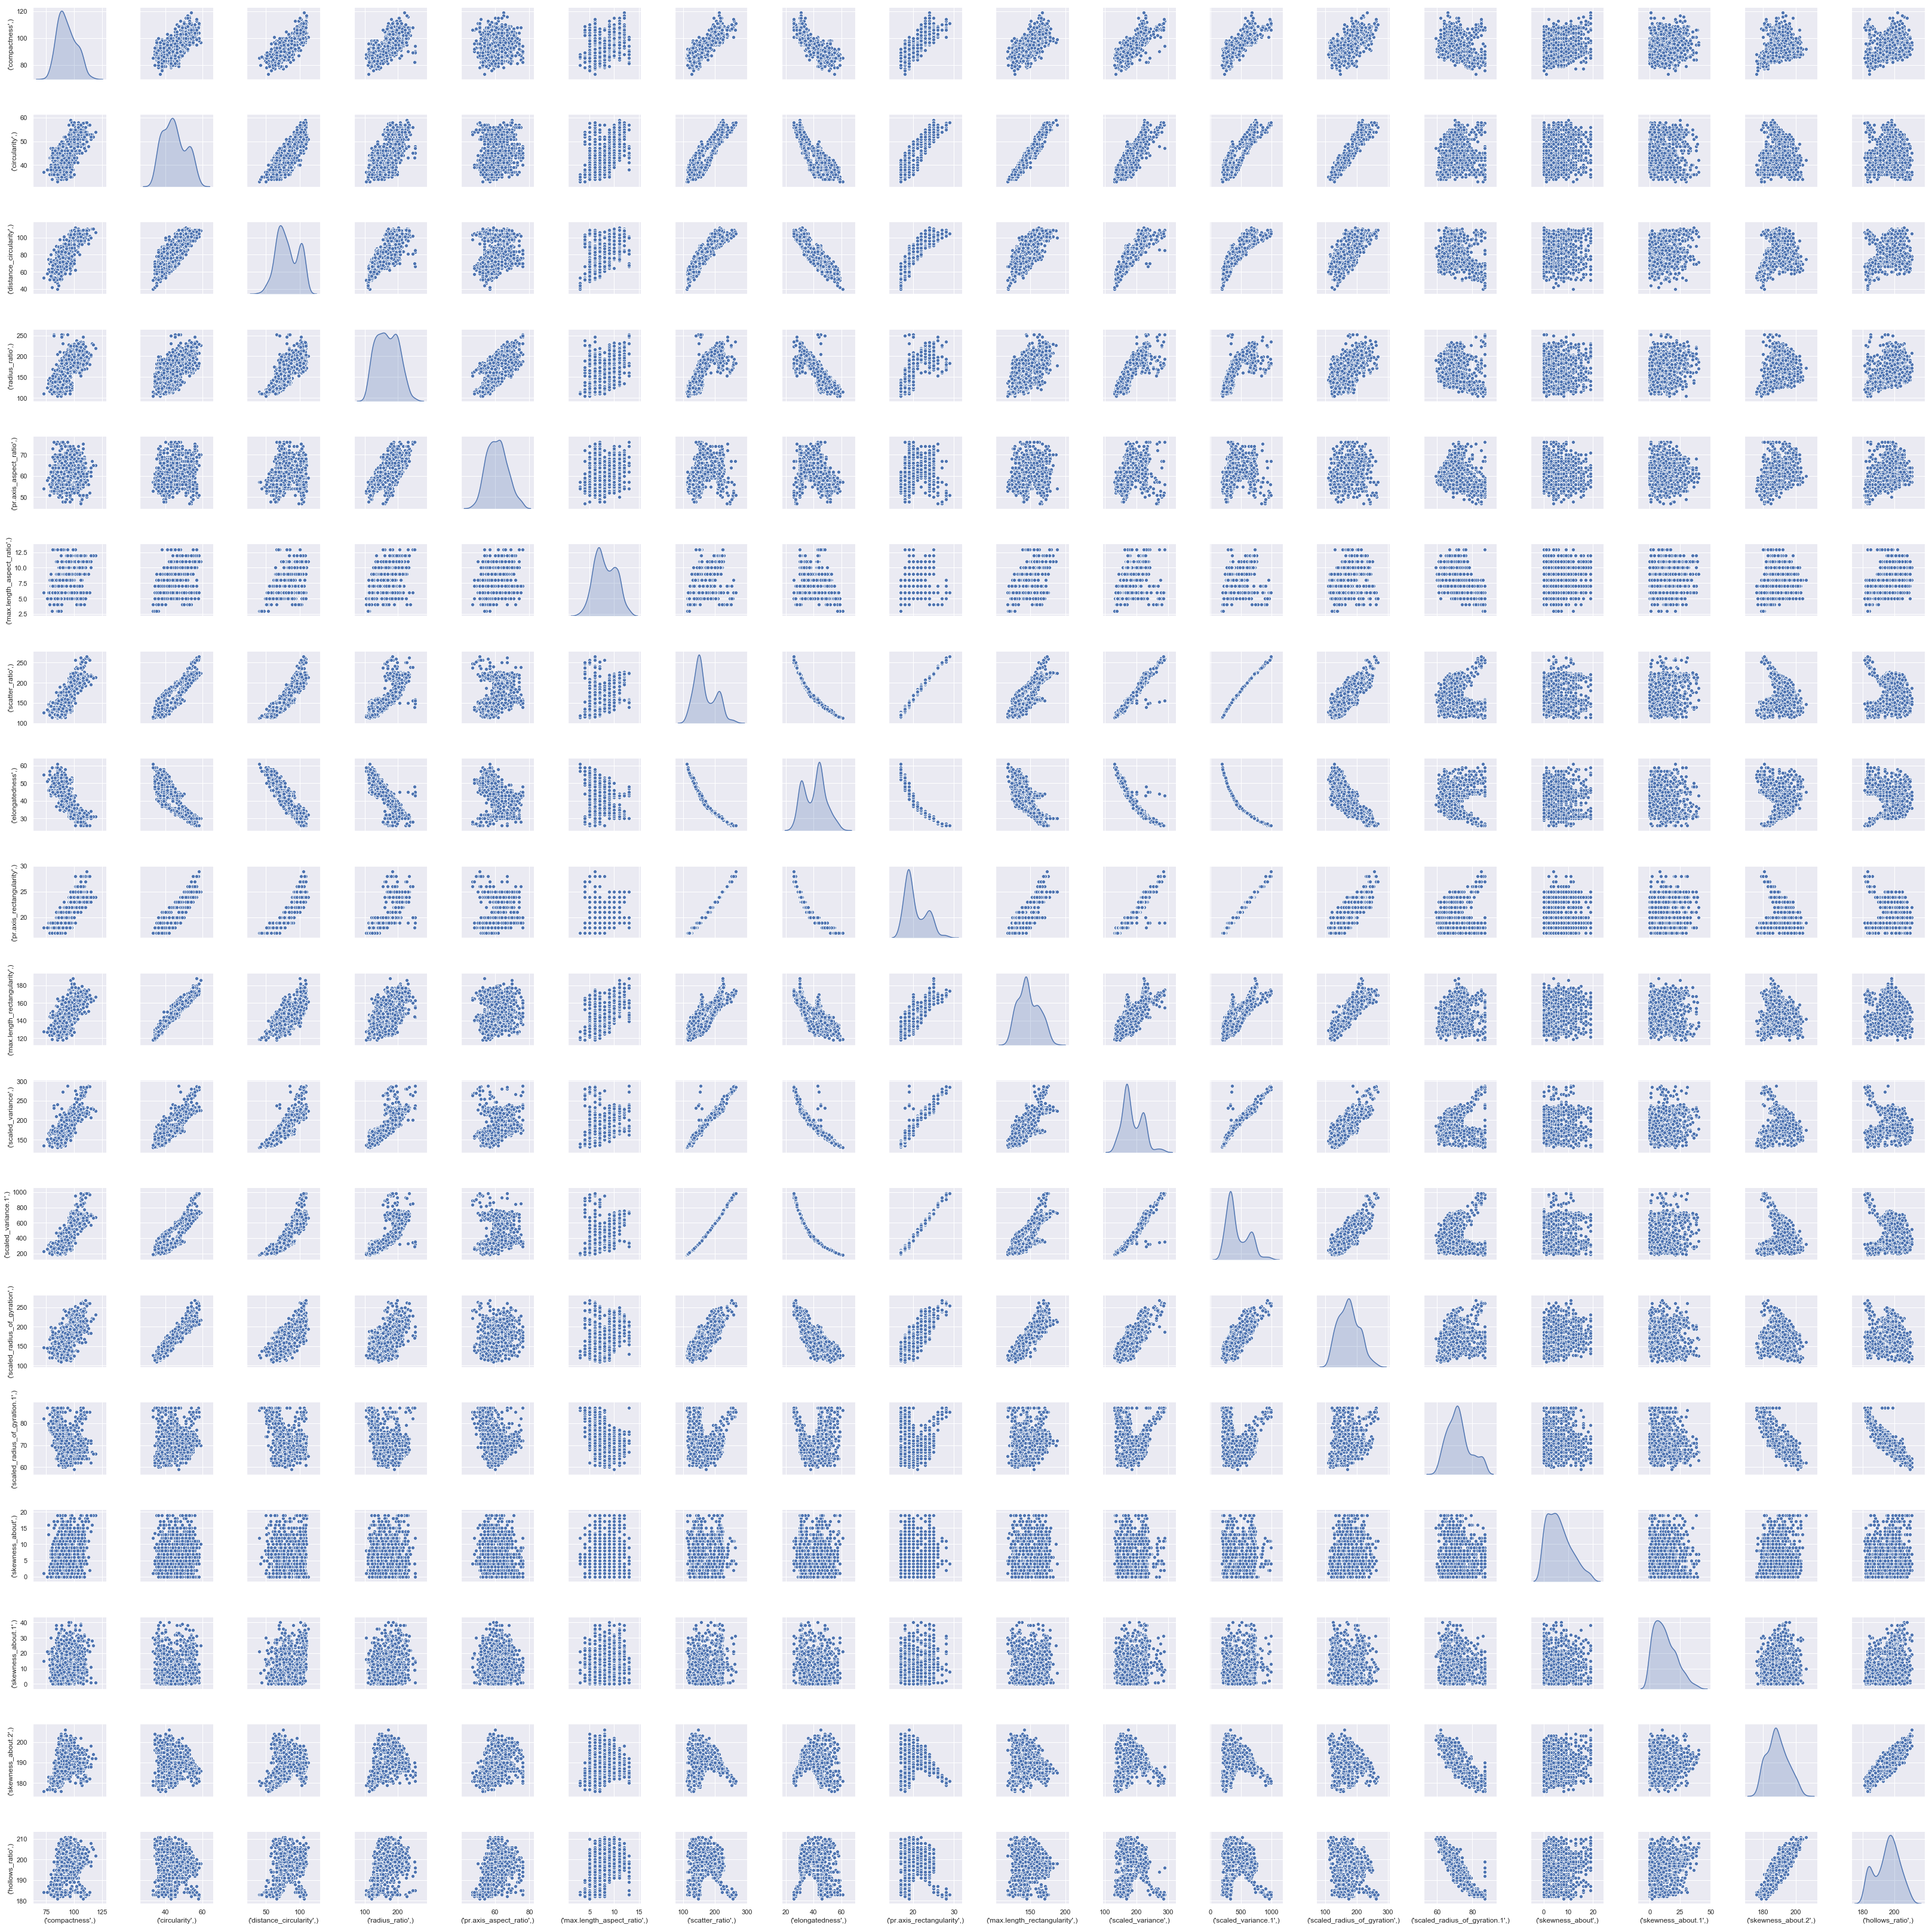

In [30]:
sns.pairplot(X,diag_kind='kde') #lets plot pair plot see intarction of indpendent variables

# we can see pr.axis_rectangularity ,skewness _about ,and skewness_about1 skewness_about 2 are having liner possitive corealation with all varibales and also we seen in feature importance these are having low importance

In [31]:
#lets drop low importance feature,which have high correlation across variables

 I have tried with out dropping any coloumns for svm and applying pca ,but accracy is 78% for pca applied data and 94% for
non pca applied data and number of features covers 95% information is 9 ,so when i drop below coloumns we can see performance is increasing (ON ORIGINAL DATASET)

In [32]:
X=X.drop(['pr.axis_rectangularity','skewness_about','skewness_about.1','skewness_about.2','scaled_radius_of_gyration',], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 13 columns):
(compactness,)                    846 non-null float64
(circularity,)                    846 non-null float64
(distance_circularity,)           846 non-null float64
(radius_ratio,)                   846 non-null float64
(pr.axis_aspect_ratio,)           846 non-null float64
(max.length_aspect_ratio,)        846 non-null float64
(scatter_ratio,)                  846 non-null float64
(elongatedness,)                  846 non-null float64
(max.length_rectangularity,)      846 non-null float64
(scaled_variance,)                846 non-null float64
(scaled_variance.1,)              846 non-null float64
(scaled_radius_of_gyration.1,)    846 non-null float64
(hollows_ratio,)                  846 non-null float64
dtypes: float64(13)
memory usage: 86.0 KB


we droped  few varibels becouse to reduce multicoliniaarity between varibles which may lead to curse of dimentionality and will imapctb in performance of models adn and attributes are more and data is low

# Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [34]:
from sklearn.decomposition import PCA

In [35]:
from scipy.stats import zscore

In [36]:
XScaled=X.apply(zscore)
XScaled.head()

compactness circularity distance_circularity radius_ratio  \
0    0.160580    0.508353             0.057292     0.284678   
1   -0.325470   -0.626530             0.120733    -0.851009   
2    1.254193    0.832605             1.516431     1.236199   
3   -0.082445   -0.626530            -0.006149    -0.298513   
4   -1.054545   -0.140152            -0.767439     1.113422   

  pr.axis_aspect_ratio max.length_aspect_ratio scatter_ratio elongatedness  \
0             1.844039                0.845236     -0.205797      0.136570   
1            -0.743502                0.379999     -0.597042      0.520843   
2             0.809023                0.845236      1.148514     -1.144341   
3             0.291515                0.379999     -0.747521      0.648935   
4             2.534050                2.240948     -0.597042      0.520843   

  max.length_rectangularity scaled_variance scaled_variance.1  \
0                  0.758332       -0.402911         -0.344910   
1                 -0.344578       -0.594935         -0.622666   
2                  0.689401        1.101272          1.106219   
3                 -0.344578       -0.914973         -0.741704   
4                 -0.275646        1.677342         -0.651008   

  scaled_radius_of_gyration.1 hollows_ratio  
0                   -0.344908      0.183957  
1                   -0.036351      0.452977  
2                    0.117928      0.049447  
3                   -1.424857      1.529056  
4                    2.277826     -1.699181

In [37]:
#covarience matrix of scaled data
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.69357215  0.79337996  0.71310712  0.17075787  0.45679538
   0.81395647 -0.78958033  0.67694334  0.76880646  0.81969132 -0.26734086
   0.36598446]
 [ 0.69357215  1.00118343  0.79955393  0.63755138  0.19193855  0.53081731
   0.86151669 -0.82972476  0.96679684  0.8129851   0.85397476  0.06583242
   0.03791627]
 [ 0.79337996  0.79955393  1.00118343  0.79295877  0.23299427  0.63004937
   0.90904151 -0.91394614  0.77579169  0.87000887  0.89181654 -0.25282765
   0.33460576]
 [ 0.71310712  0.63755138  0.79295877  1.00118343  0.68060537  0.49045074
   0.76294576 -0.81760847  0.58199199  0.80022051  0.75100446 -0.33787591
   0.48288867]
 [ 0.17075787  0.19193855  0.23299427  0.68060537  1.00118343  0.21109391
   0.17736553 -0.27968227  0.15218029  0.23983424  0.16269442 -0.25128382
   0.39207943]
 [ 0.45679538  0.53081731  0.63004937  0.49045074  0.21109391  1.00118343
   0.45764979 -0.47347969  0.62420837  0.41877058  0.4187051  -0.28055137
   0.38628494]
 [ 0.81395647  0.86151

In [38]:
#lets intialize and fit pca
pca = PCA(n_components=13)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=13, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [39]:
print(pca.explained_variance_) #explained variance of each attributes

[8.11702854e+00 2.30663824e+00 9.93209533e-01 7.69424113e-01
 3.15634135e-01 2.31869022e-01 9.18820432e-02 6.04722502e-02
 5.73515318e-02 2.99804243e-02 2.19476079e-02 1.94355912e-02
 5.11589728e-04]


The eigen Vectors

In [40]:
print(pca.components_) #principle components

[[-0.30046109 -0.3112321  -0.33308411 -0.30265163 -0.11664921 -0.21394968
  -0.33684301  0.33734635 -0.3010768  -0.32675298 -0.33287736  0.0624723
  -0.10743612]
 [-0.0508616   0.17651348 -0.03092262 -0.20724473 -0.32055579 -0.16045196
   0.13532293 -0.05824068  0.15346156  0.14153192  0.14579256  0.59292179
  -0.5964486 ]
 [-0.15555214 -0.04973188 -0.12299892  0.3535305   0.75770782 -0.33826441
  -0.00133195 -0.05968098 -0.15346768  0.12305832  0.00419481  0.27368813
  -0.16580624]
 [-0.27222888  0.23011229 -0.03426    -0.03107957  0.29677634  0.69429802
  -0.1697656   0.15704977  0.35338918 -0.16853129 -0.21103516  0.19875949
  -0.09930401]
 [-0.16850954 -0.50793627  0.24101946  0.14495914 -0.11821528  0.48714078
   0.09173322 -0.12616539 -0.50328285  0.24357288  0.05028897  0.16476033
  -0.12880896]
 [ 0.85381366 -0.16131457 -0.22671496  0.05024932  0.09049667  0.1819857
  -0.10783646  0.23106461 -0.06969118 -0.04870056 -0.06635441  0.26510809
  -0.05304116]
 [-0.16732959 -0.0542272

In [41]:
#And the percentage of variation explained by each eigen Vector

In [42]:
print(pca.explained_variance_ratio_)

[6.23648765e-01 1.77223978e-01 7.63104251e-02 5.91165099e-02
 2.42508496e-02 1.78149958e-02 7.05949505e-03 4.64621307e-03
 4.40644157e-03 2.30346050e-03 1.68628193e-03 1.49327828e-03
 3.93065394e-05]


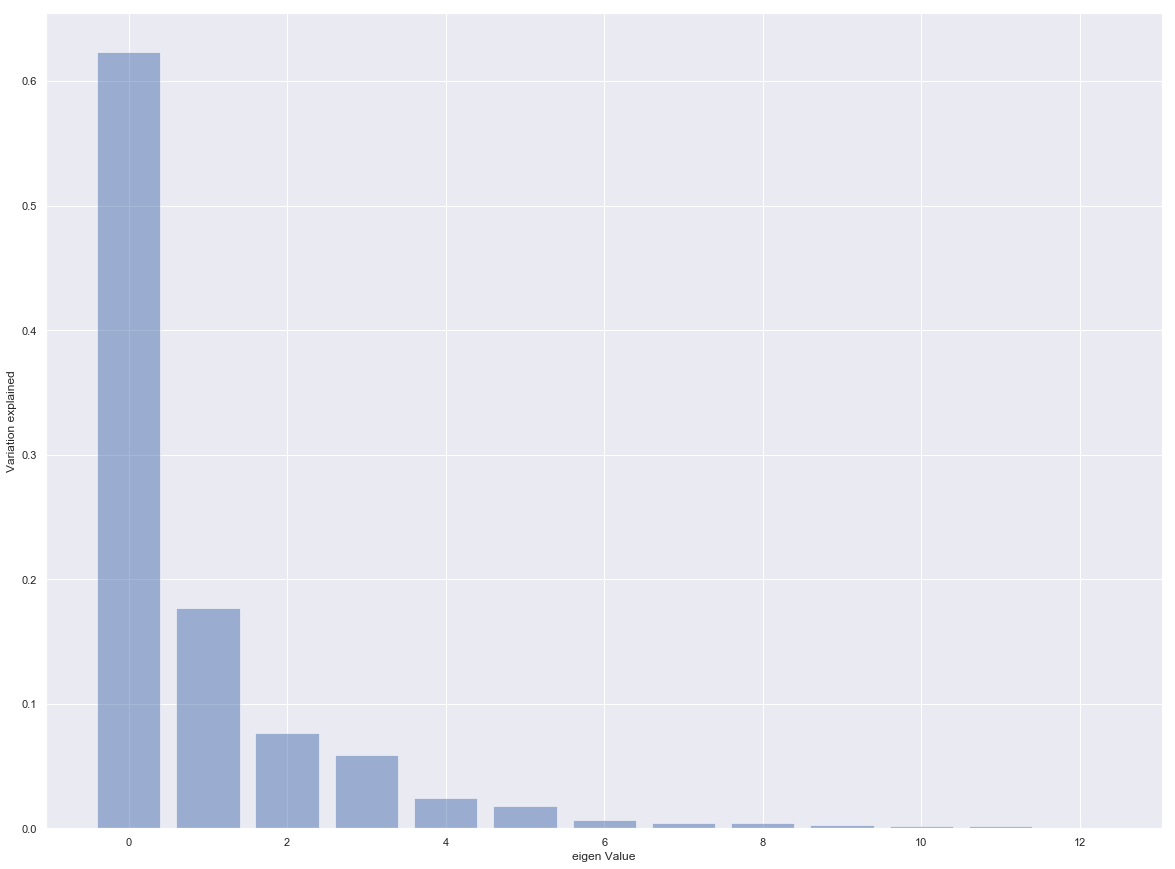

In [43]:
#lets visualize the contribution of variance of each attribute
plt.bar(list(range(13)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

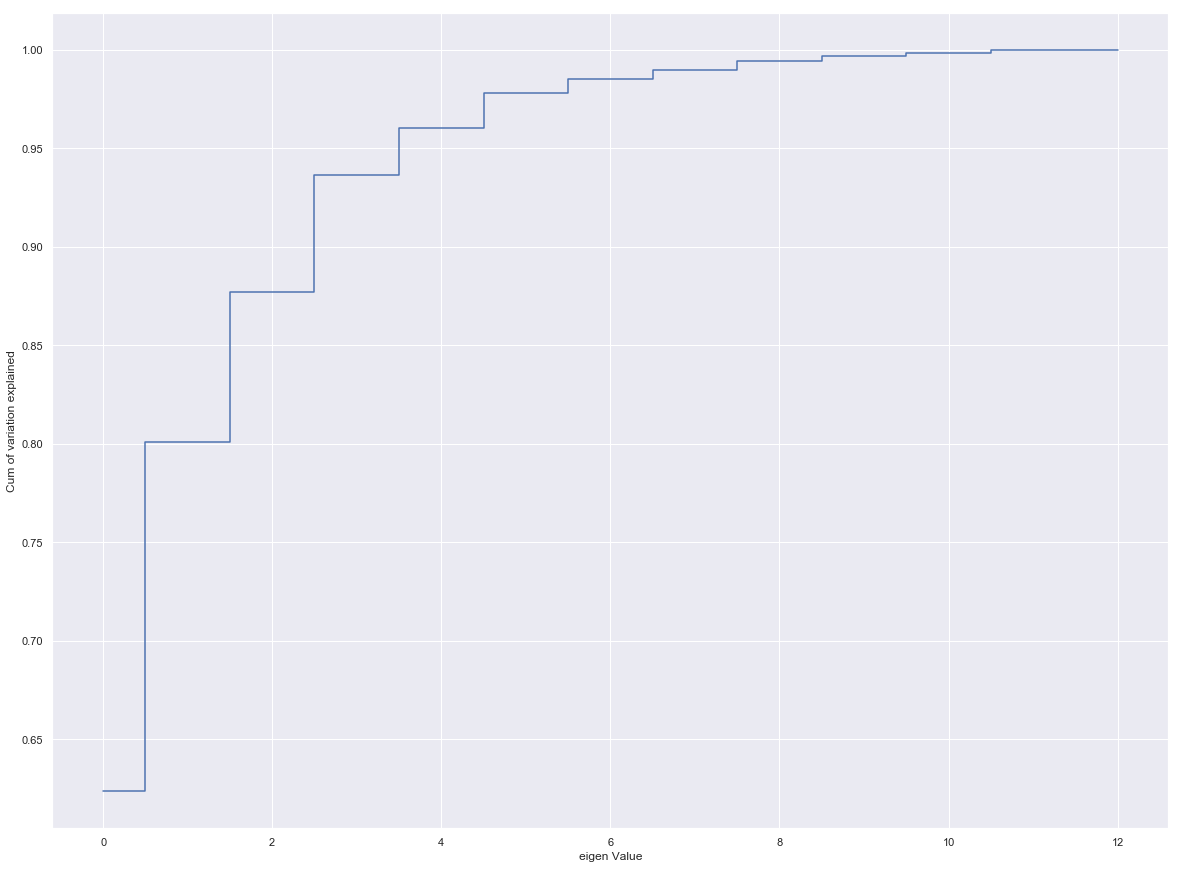

In [44]:
#we can see 5 attributes explaines 95% of variance overall.
plt.step(list(range(13)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


# Dimensionality Reduction

Now 5  or 7 dimensions seems very reasonable. With 5 or 7variables we can explain over 95% of the variation in the original data! ,have tried with 5 diemnsions accuracy is less than 7 dimensions ,so will keep 7 dimensions here

In [45]:
#lets fit pca with 5 attributes
pca3 = PCA(n_components=7)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[-0.30046109 -0.3112321  -0.33308411 -0.30265163 -0.11664921 -0.21394968
  -0.33684301  0.33734635 -0.3010768  -0.32675298 -0.33287736  0.0624723
  -0.10743612]
 [-0.0508616   0.17651348 -0.03092262 -0.20724473 -0.32055579 -0.16045196
   0.13532293 -0.05824068  0.15346156  0.14153192  0.14579256  0.59292179
  -0.5964486 ]
 [-0.15555214 -0.04973188 -0.12299892  0.3535305   0.75770782 -0.33826441
  -0.00133195 -0.05968098 -0.15346768  0.12305832  0.00419481  0.27368813
  -0.16580624]
 [-0.27222888  0.23011229 -0.03426    -0.03107957  0.29677634  0.69429802
  -0.1697656   0.15704977  0.35338918 -0.16853129 -0.21103516  0.19875949
  -0.09930401]
 [-0.16850954 -0.50793627  0.24101946  0.14495914 -0.11821528  0.48714078
   0.09173322 -0.12616539 -0.50328285  0.24357288  0.05028897  0.16476033
  -0.12880896]
 [ 0.85381366 -0.16131457 -0.22671496  0.05024932  0.09049667  0.1819857
  -0.10783646  0.23106461 -0.06969118 -0.04870056 -0.06635441  0.26510809
  -0.05304116]
 [-0.16732959 -0.0542272

In [46]:
Xpca3  #pca applied data

array([[-6.15417918e-01, -1.04690566e+00,  8.54482306e-01, ...,
        -6.50210357e-01,  3.19330191e-01, -4.55528967e-01],
       [ 1.34685028e+00, -3.74761351e-01, -1.06410523e+00, ...,
         3.64204986e-01,  2.85787245e-04,  8.64567059e-02],
       [-3.49691163e+00,  7.05679970e-02,  4.66307544e-01, ...,
         4.66244733e-01,  3.47182883e-01, -3.77576674e-01],
       ...,
       [-4.87159743e+00, -4.51963186e-01,  3.18535798e-02, ...,
        -3.58829107e-02,  3.48527888e-01,  1.84102162e-01],
       [ 3.06333891e+00, -1.05375641e+00, -4.44055518e-01, ...,
         6.57629400e-01, -3.33625335e-01, -7.35897241e-01],
       [ 4.56086499e+00,  2.99513170e-01, -3.99424564e-01, ...,
        -1.45855884e-01,  5.78014605e-02, -4.99295832e-01]])

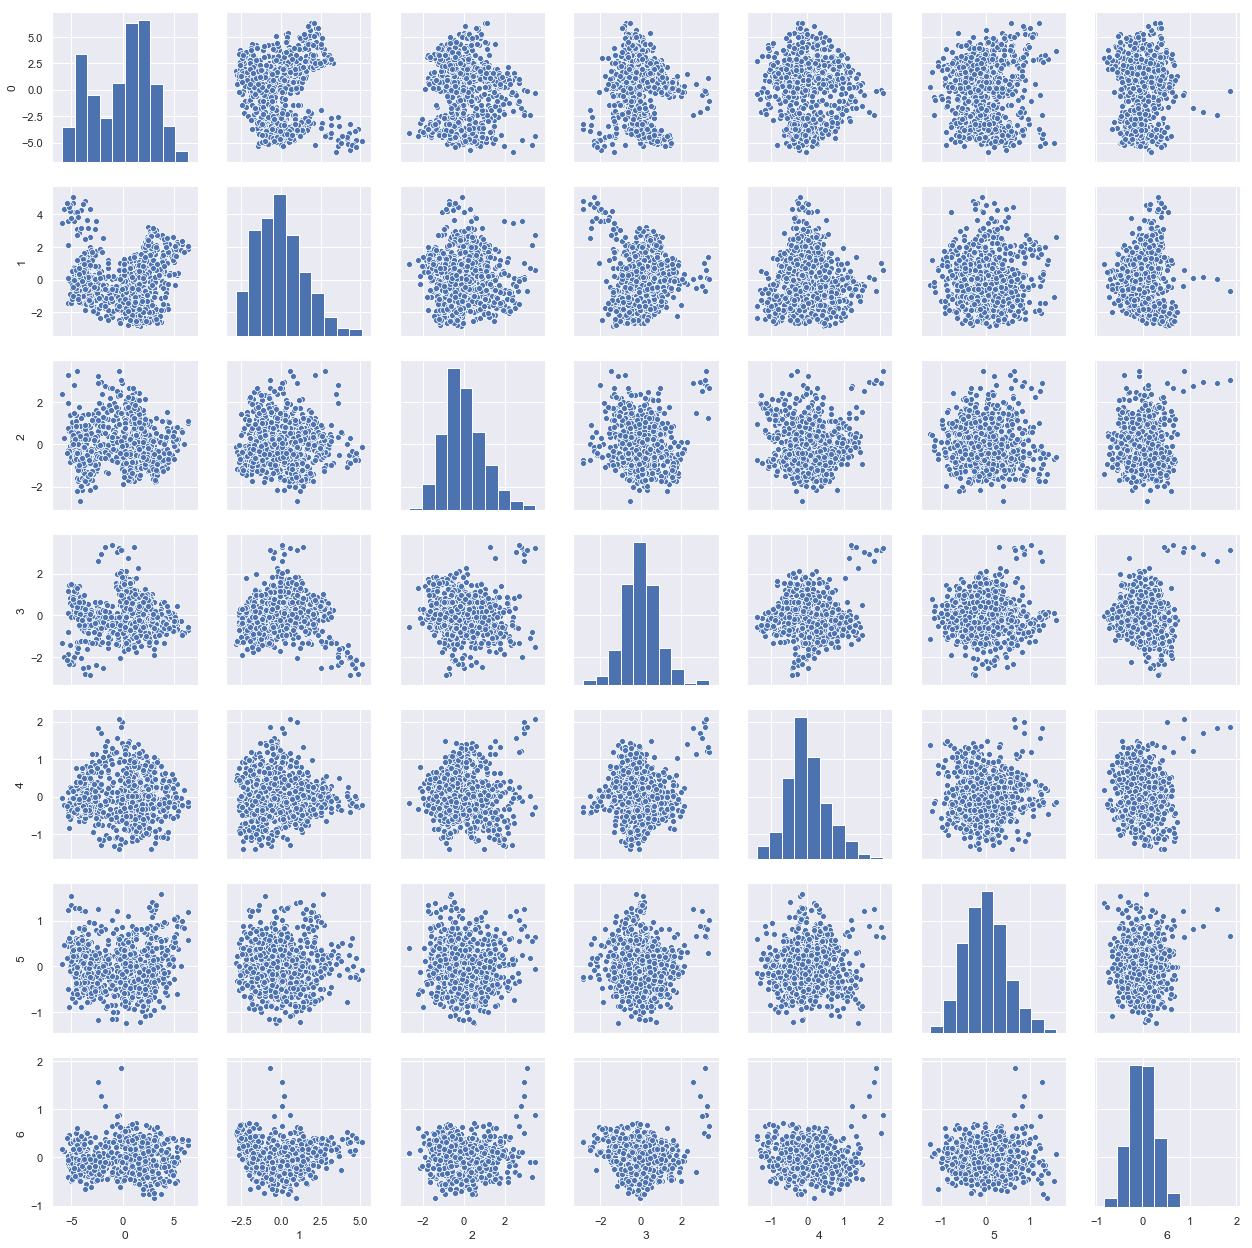

In [47]:
sns.pairplot(pd.DataFrame(Xpca3)) #pair plot on pca data

# Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X).

# 1) Lets build SVM model with pca applied data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xpca3, y, test_size=0.30, random_state=1)

In [49]:
from sklearn.svm import SVC
from sklearn import svm
svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_fit=svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(metrics.confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))
print('Training accuracy: %.2f%%' % (accuracy_score(Y_train, svc_fit.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(Y_test, svc_pred) * 100))
print('*'*100) 

The accuracy of Radical SVC Model is 0.9094488188976378
[[ 55   4   0]
 [  3 126   4]
 [  7   5  50]]
              precision    recall  f1-score   support

         bus       0.85      0.93      0.89        59
         car       0.93      0.95      0.94       133
         van       0.93      0.81      0.86        62

    accuracy                           0.91       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.91      0.91      0.91       254

Training accuracy: 95.44%
Testing accuracy: 90.94%
****************************************************************************************************


with only 7 attributes we are geeting 90.94% accuracy with out lossing much info

# 2)Lets build svm model with out pca  applied data

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [51]:
from sklearn.svm import SVC
from sklearn import svm
svc_radical =svm.SVC(kernel='rbf',gamma='scale')
svc_fit=svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(metrics.confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))
print('Training accuracy: %.2f%%' % (accuracy_score(Y_train, svc_fit.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(Y_test, svc_pred) * 100))
print('*'*100)
   

The accuracy of Radical SVC Model is 0.9291338582677166
[[ 57   2   0]
 [  3 127   3]
 [  5   5  52]]
              precision    recall  f1-score   support

         bus       0.88      0.97      0.92        59
         car       0.95      0.95      0.95       133
         van       0.95      0.84      0.89        62

    accuracy                           0.93       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254

Training accuracy: 96.11%
Testing accuracy: 92.91%
****************************************************************************************************


we can see that with out pca accuracy is more but when it comes to test data set  pca applied model can perform better

# 5 .Optional - Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy. 

# 1)Lets apply hyper parameters to non pca applied data(raw data)

In [52]:
param_grid = {'C':[0.01, 0.05, 0.5, 1],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']} #will define parameter grid

In [53]:
#using grid search cv we will find out hyper parameter
grid = GridSearchCV(SVC(),param_grid,refit = True,cv=5, verbose=2)

In [54]:
grid=grid.fit(X_train,Y_train.values.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=0.01, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=linear ..............................
[CV] ............... C=0.01, gamma=0.001, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.01, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .

[CV] ................. C=0.05, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=0.0001, kernel=rbf ................................
[CV] ................. C=0.05, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] .................... C=0.5, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] .................... C=0.5, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] .................... C=0.5, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] .................... C=0.5, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=1, kernel=linear ...................................
[CV] .................... C=0.5, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.5, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] ................. C=1, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .................... C=1, gamma=0.0001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.5s finished


In [55]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [56]:
## print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [57]:

grid_predictions = grid.predict(X_test) 
  
# print classification report 
print(classification_report(Y_test, grid_predictions))

              precision    recall  f1-score   support

         bus       0.88      0.97      0.92        59
         car       0.95      0.95      0.95       133
         van       0.95      0.84      0.89        62

    accuracy                           0.93       254
   macro avg       0.92      0.92      0.92       254
weighted avg       0.93      0.93      0.93       254



In [58]:
#lets fit svc with hyper parameterfor non pca data
svc_radical =svm.SVC(C=0.5,kernel='rbf',gamma=0.1)
svc_fit=svc_radical.fit(X_train,Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,Y_test)
svc_pred = svc_radical.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)
print(metrics.confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))
print('Training accuracy: %.2f%%' % (accuracy_score(Y_train, svc_fit.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(Y_test, svc_pred) * 100))
print('*'*125)

The accuracy of Radical SVC Model is 0.9212598425196851
[[ 57   2   0]
 [  3 127   3]
 [  7   5  50]]
              precision    recall  f1-score   support

         bus       0.85      0.97      0.90        59
         car       0.95      0.95      0.95       133
         van       0.94      0.81      0.87        62

    accuracy                           0.92       254
   macro avg       0.91      0.91      0.91       254
weighted avg       0.92      0.92      0.92       254

Training accuracy: 94.93%
Testing accuracy: 92.13%
*****************************************************************************************************************************


c value of 1 usaully gives much more accuracy than c=0.5 and we can use c=1 also to improve accuracy

# We can see after tunning hyper parameter accuracy is improved for non pca data

In [59]:
print('*'*254)

**************************************************************************************************************************************************************************************************************************************************************


# 2)Lets apply Hyper parameters to  pca applied data

# lets see for pca data  and will find hyper parameter

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(Xpca3, y.values.ravel(), test_size=0.30, random_state=1)

In [61]:
param_grid = {'C':[0.01, 0.05, 0.5, 1],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}

In [62]:
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

In [63]:
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] ................... C=0.01, gamma=1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ...................... C=0.01, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] ................. C=0.01, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] .

[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=0.001, kernel=rbf .................................
[CV] .................. C=0.05, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=0.05, gamma=0.0001, kernel=linear .............................
[CV] .............. C=0.05, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=0.05, gamma=0.0001, kernel=linear .............................
[CV] .............. C=0.05, gamma=0.0001, kernel=linear, total=   0.0s
[CV] C=0.05, gamma=0.0001, kernel=linear .............................
[CV] .

[CV] ...................... C=1, gamma=1, kernel=linear, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .................... C=1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.5, 1],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [64]:
# print best parameter after tuning 
print(grid.best_params_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [65]:
#lets fit svc using hyper parameter for pca data
svc_pca =svm.SVC(C=1,kernel='rbf',gamma=0.1)
svc_fit=svc_pca.fit(X_train,Y_train)
score_svc_pca = svc_pca.score(X_test,Y_test)
svc_pred = svc_pca.predict(X_test)
print('The accuracy of Radical SVC Model is', score_svc_pca)
print(metrics.confusion_matrix(Y_test, svc_pred))
print(classification_report(Y_test,svc_pred))
print('Training accuracy: %.2f%%' % (accuracy_score(Y_train, svc_fit.predict(X_train)) * 100))
print('Testing accuracy: %.2f%%' % (accuracy_score(Y_test, svc_pred) * 100))
print('*'*100)

The accuracy of Radical SVC Model is 0.9094488188976378
[[ 56   3   0]
 [  4 125   4]
 [  7   5  50]]
              precision    recall  f1-score   support

         bus       0.84      0.95      0.89        59
         car       0.94      0.94      0.94       133
         van       0.93      0.81      0.86        62

    accuracy                           0.91       254
   macro avg       0.90      0.90      0.90       254
weighted avg       0.91      0.91      0.91       254

Training accuracy: 95.95%
Testing accuracy: 90.94%
****************************************************************************************************


# After tuning hyper parameter  pca model is same as earlier

# Performing  cross validation with hyperparameter tuned pca data


In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
from sklearn.model_selection import KFold

In [68]:
svc_pca =svm.SVC(C=1,kernel='rbf',gamma=0.1)

In [69]:
cross_val_score(svc_pca,Xpca3,y.values.ravel(),cv=10,scoring='accuracy').mean()


0.9420448179271709

# After cross validation for  pca data  acuracy is improved 

# Performing  cross validation with hyperparameter non pca data(Raw data)

In [70]:
cross_val_score(svc_radical,XScaled,y.values.ravel(),cv=10,scoring='accuracy').mean()

0.943235294117647

# After cross validation for non pca data  acuracy is improved 